In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("rock_density_xray.csv")

In [3]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


D:\Downloads\Python\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rebound Signal Strength nHz', ylabel='Rock Density kg/m3'>

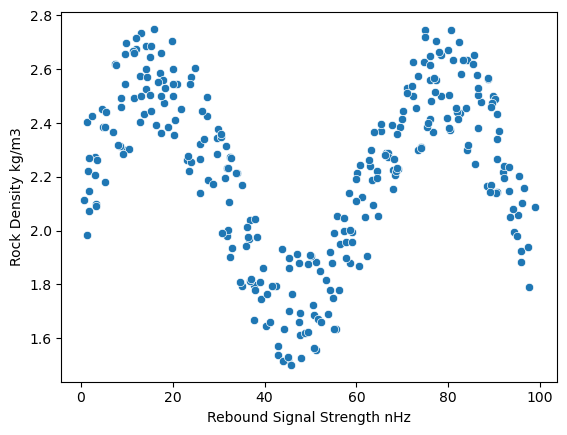

In [6]:
sns.scatterplot(df["Rebound Signal Strength nHz"],df["Rock Density kg/m3"])

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df.drop("Rock Density kg/m3", axis = 1)

In [9]:
y = df["Rock Density kg/m3"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
LR = LinearRegression()

In [13]:
LR.fit(X_train,y_train)

LinearRegression()

In [25]:
LR_pred = LR.predict(X_test)
DF_LR = pd.DataFrame(LR_pred,columns=["LR_Y"])
DF_LR

,LR_Y
0,2.220297
1,2.220478
2,2.220356
3,2.220343
4,2.220397
5,2.220506
6,2.220427
7,2.220289
8,2.220347
9,2.220297


In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [21]:
mean_absolute_error(y_test,LR_pred)

0.211198973318633

In [26]:
sns.scatterplot(X_test, )

D:\Downloads\Python\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Data must be 1-dimensional

In [28]:
LR_X = X_test["Rebound Signal Strength nHz"]

In [33]:
signal_range = np.arange(1,100)
signal_pred_LR = LR.predict(signal_range.reshape(-1,1))

D:\Downloads\Python\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


D:\Downloads\Python\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


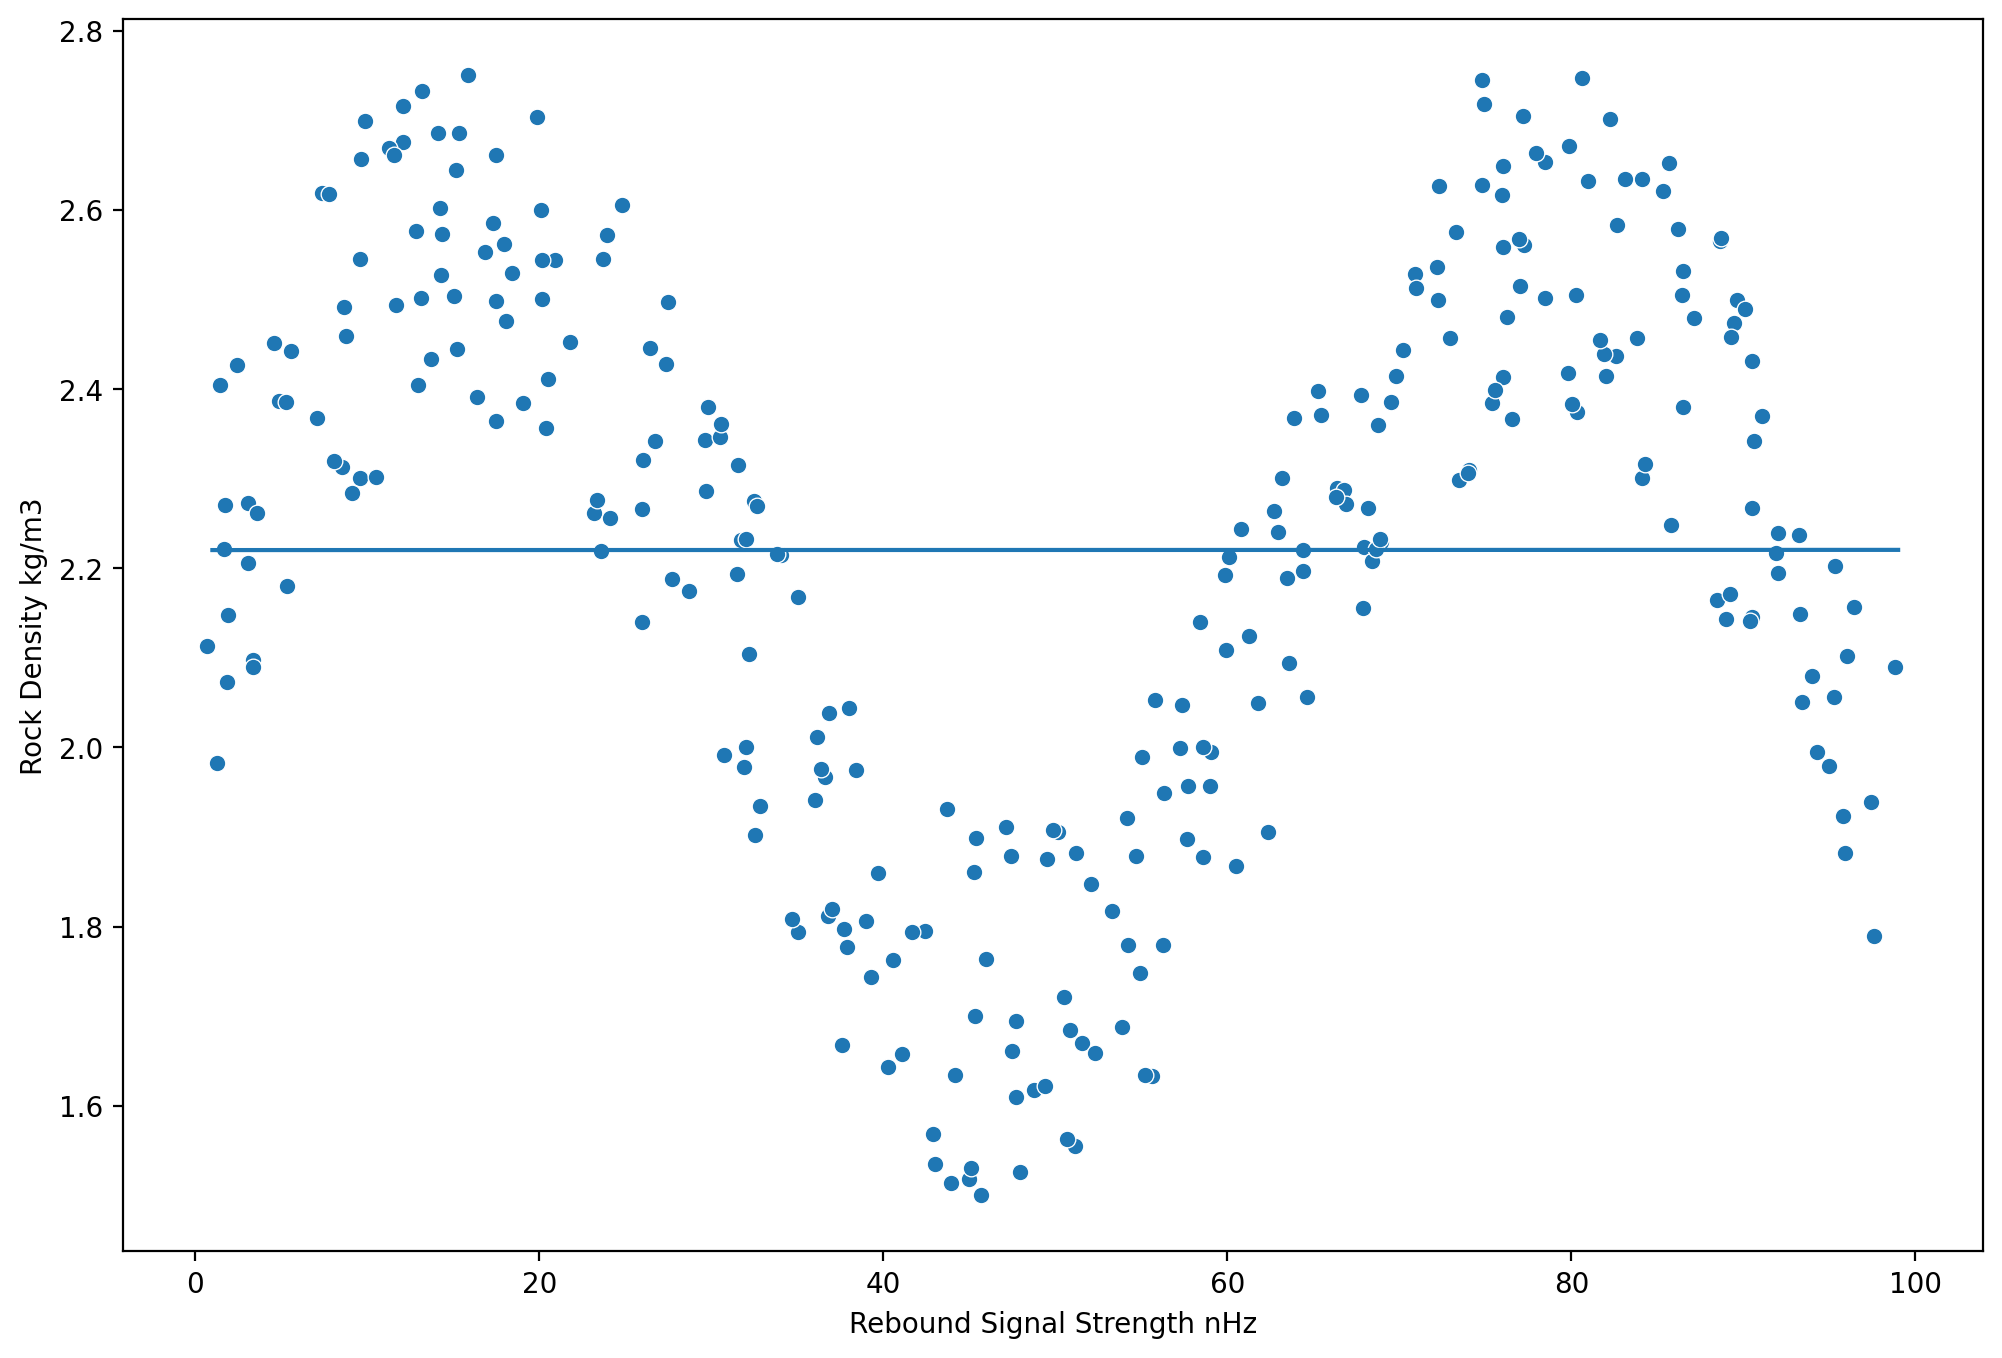

In [35]:
plt.figure(figsize=(12,8),dpi = 200)
sns.scatterplot(df["Rebound Signal Strength nHz"],df["Rock Density kg/m3"])
plt.plot(signal_range,signal_pred_LR)

In [43]:
def run_model(model,X_train,y_train, X_test,y_test):
    #fit model training
    model.fit(X_train,y_train)
    #get metrics
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    
    #plot results model signal range
    signal_range = np.arange(1,100)
    signal_pred = model.predict(signal_range.reshape(-1,1))
    plt.figure(figsize=(12,8),dpi = 200)
    sns.scatterplot(df["Rebound Signal Strength nHz"],df["Rock Density kg/m3"],color="black")
    plt.plot(signal_range,signal_pred)
          

MAE: 0.211198973318633
RMSE: 0.2570051996584629


D:\Downloads\Python\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\Downloads\Python\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


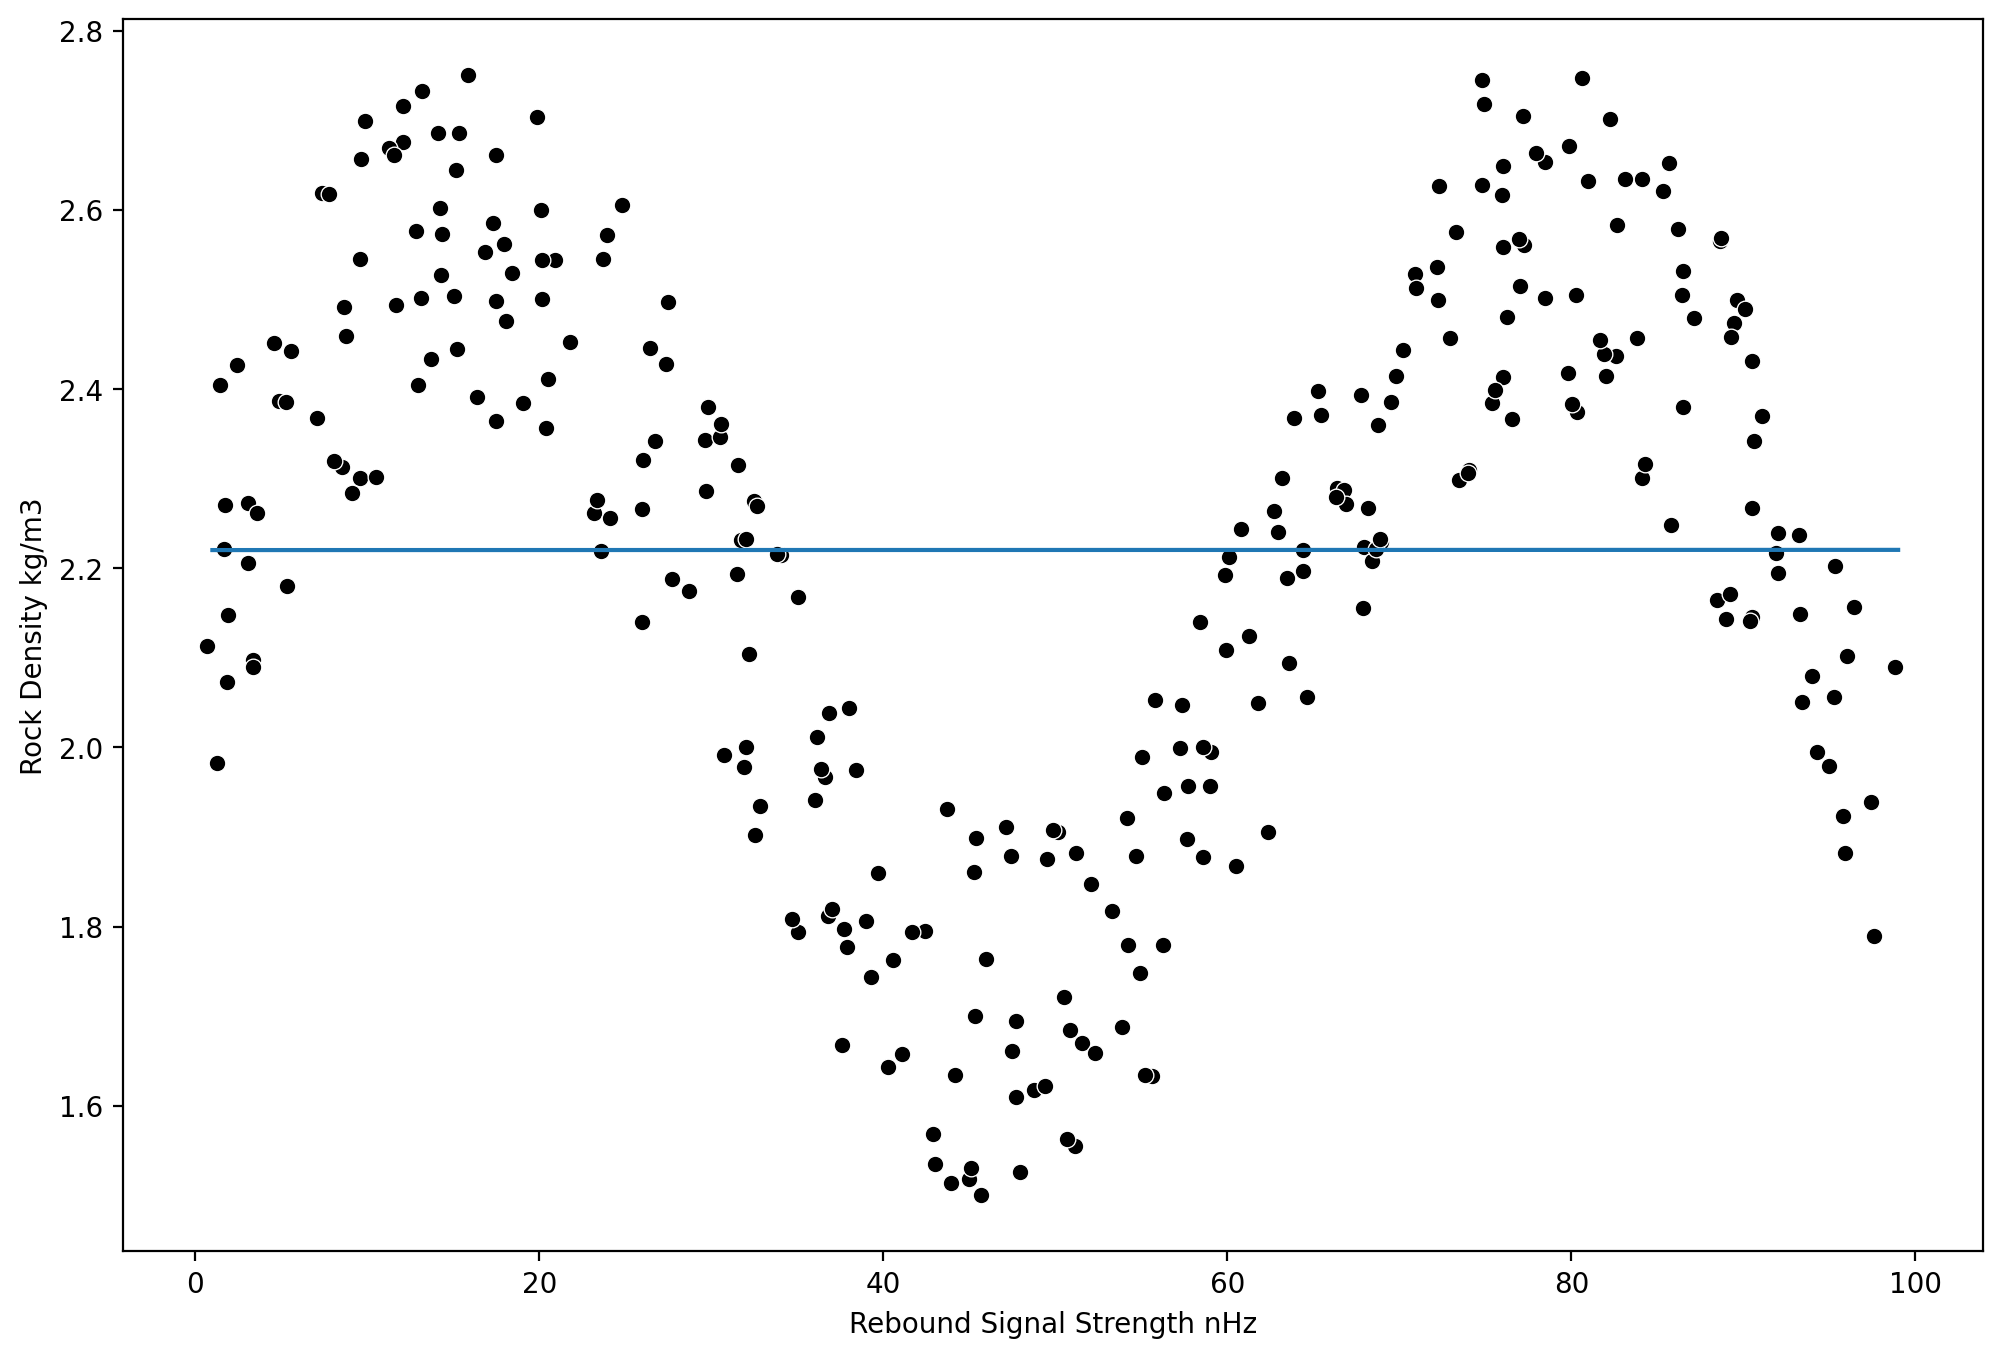

In [45]:
model = LinearRegression()
run_model(model,X_train,y_train,X_test,y_test)

In [49]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [52]:
pipe = make_pipeline(PolynomialFeatures(degree=2),LinearRegression())

MAE: 0.22903105443511165
RMSE: 0.28173095637255463


D:\Downloads\Python\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
D:\Downloads\Python\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


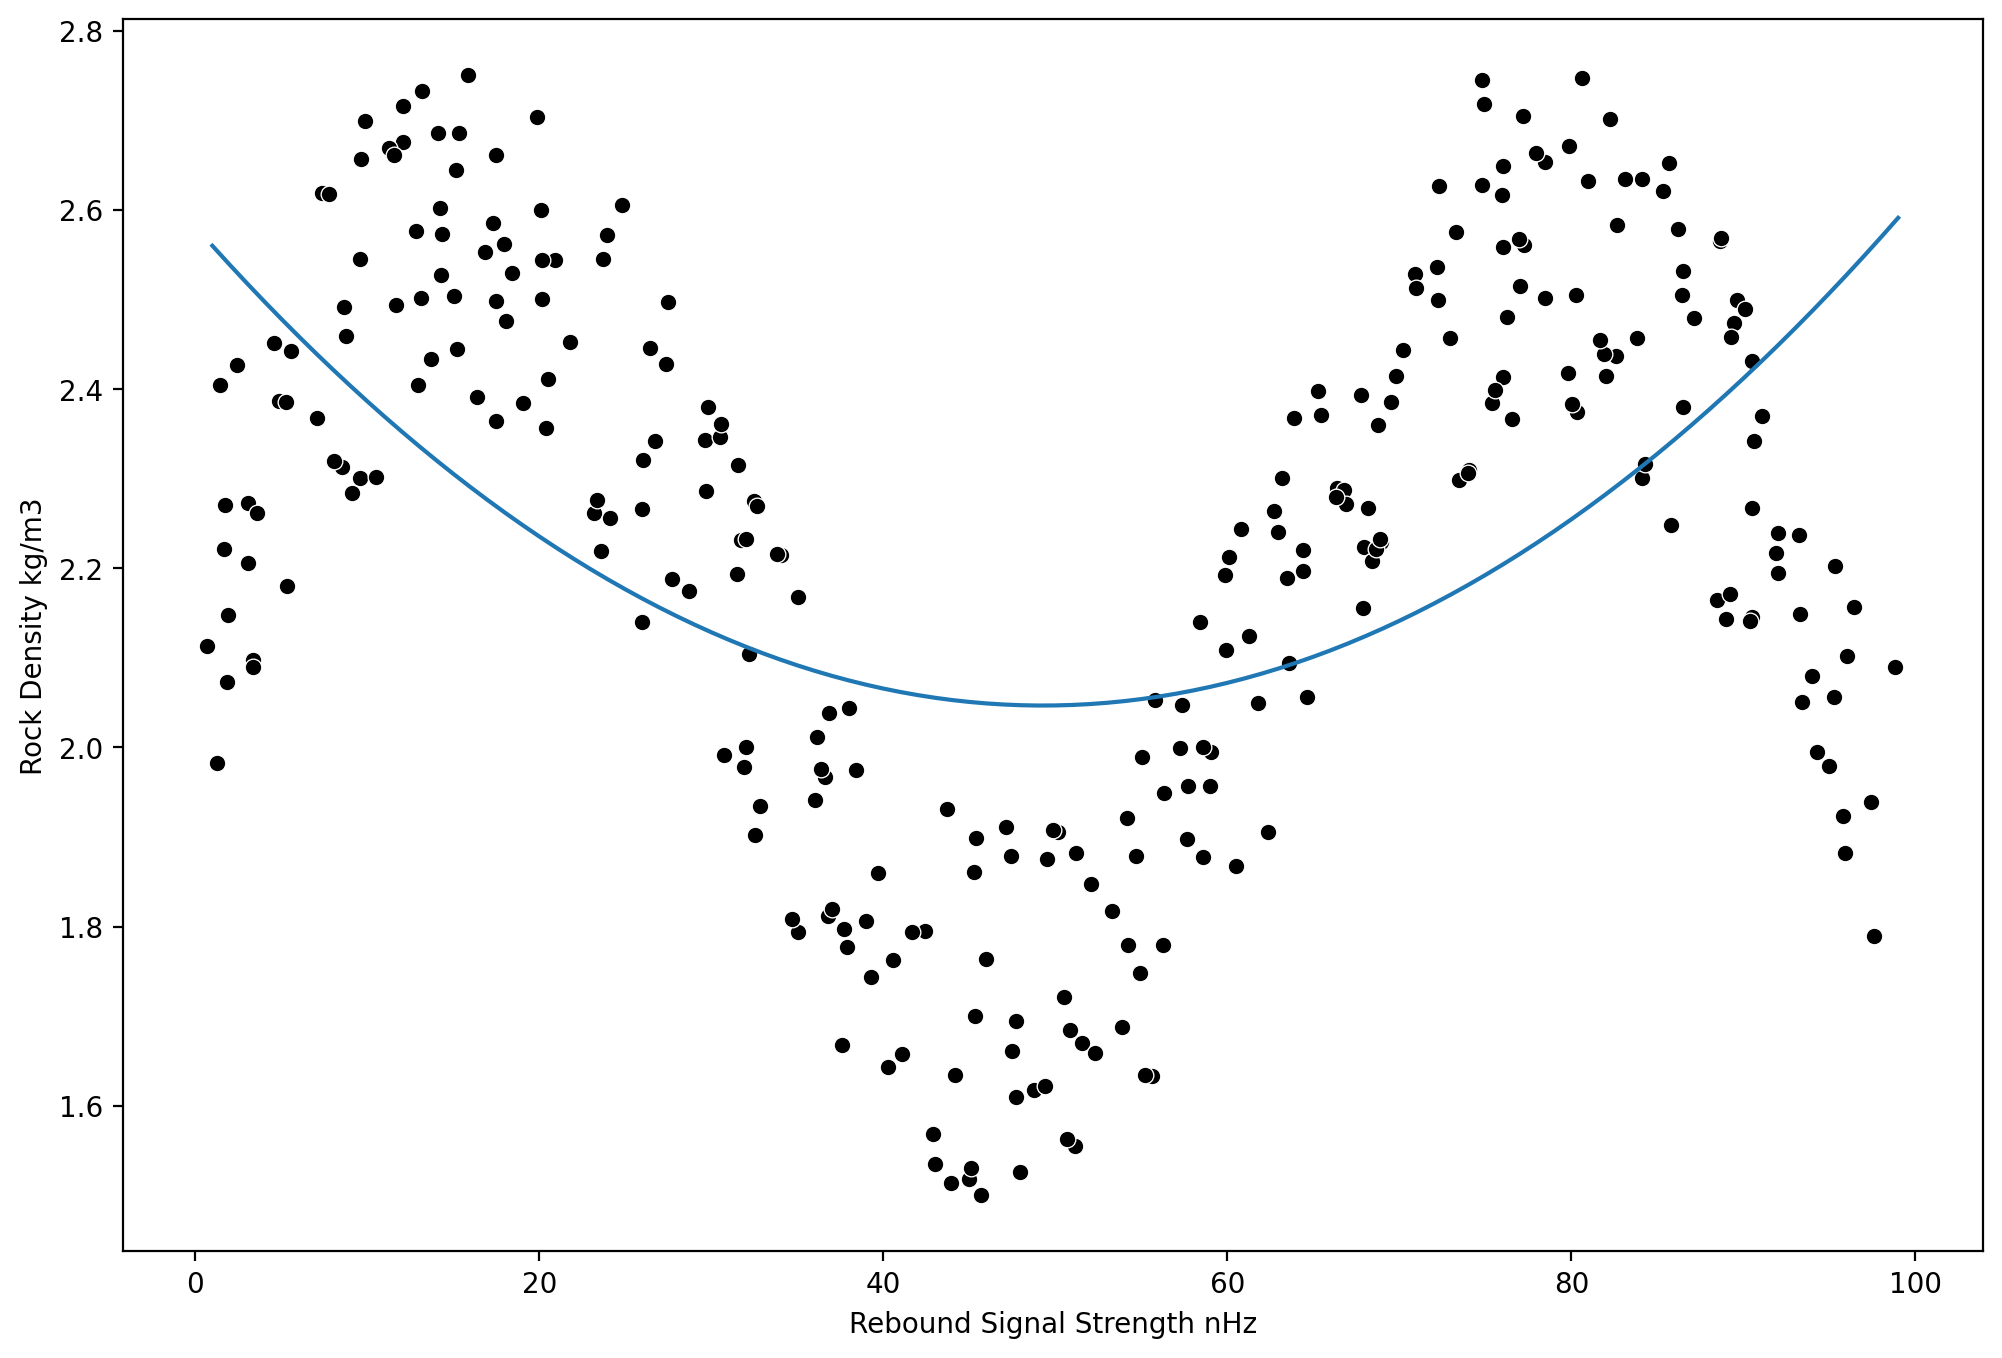

In [53]:

run_model(pipe,X_train,y_train,X_test,y_test)

In [54]:
from sklearn.neighbors import KNeighborsRegressor

MAE: 0.11877297474442378
RMSE: 0.1523487028635337
MAE: 0.12198383614100558
RMSE: 0.13730685016923647
MAE: 0.11635971693292672
RMSE: 0.13277855732740926


D:\Downloads\Python\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
D:\Downloads\Python\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Downloads\Python\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
D:\Downloads\Python\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error o

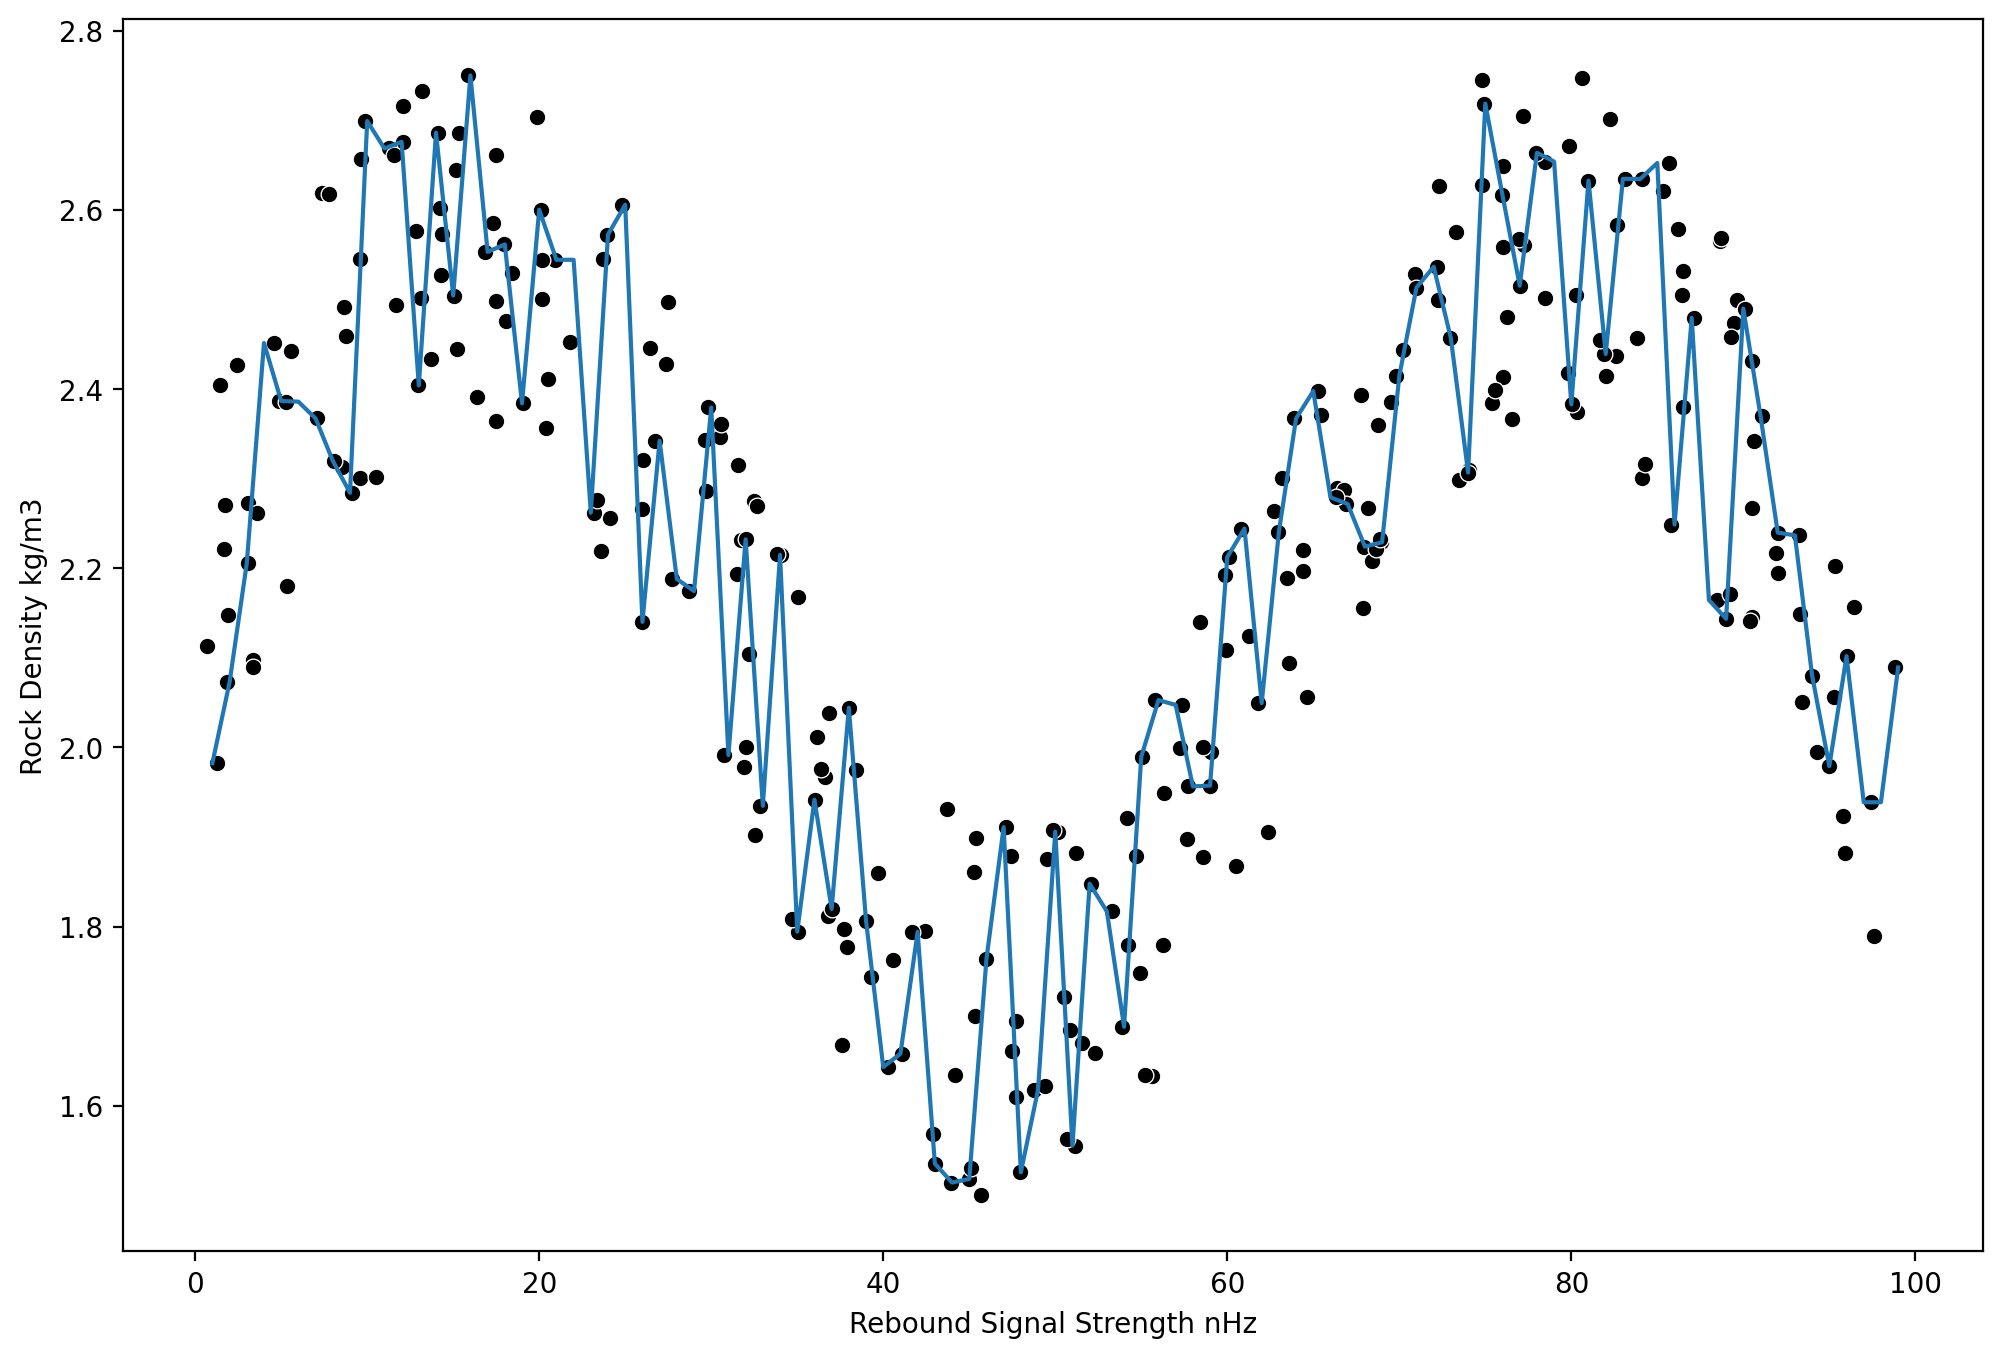

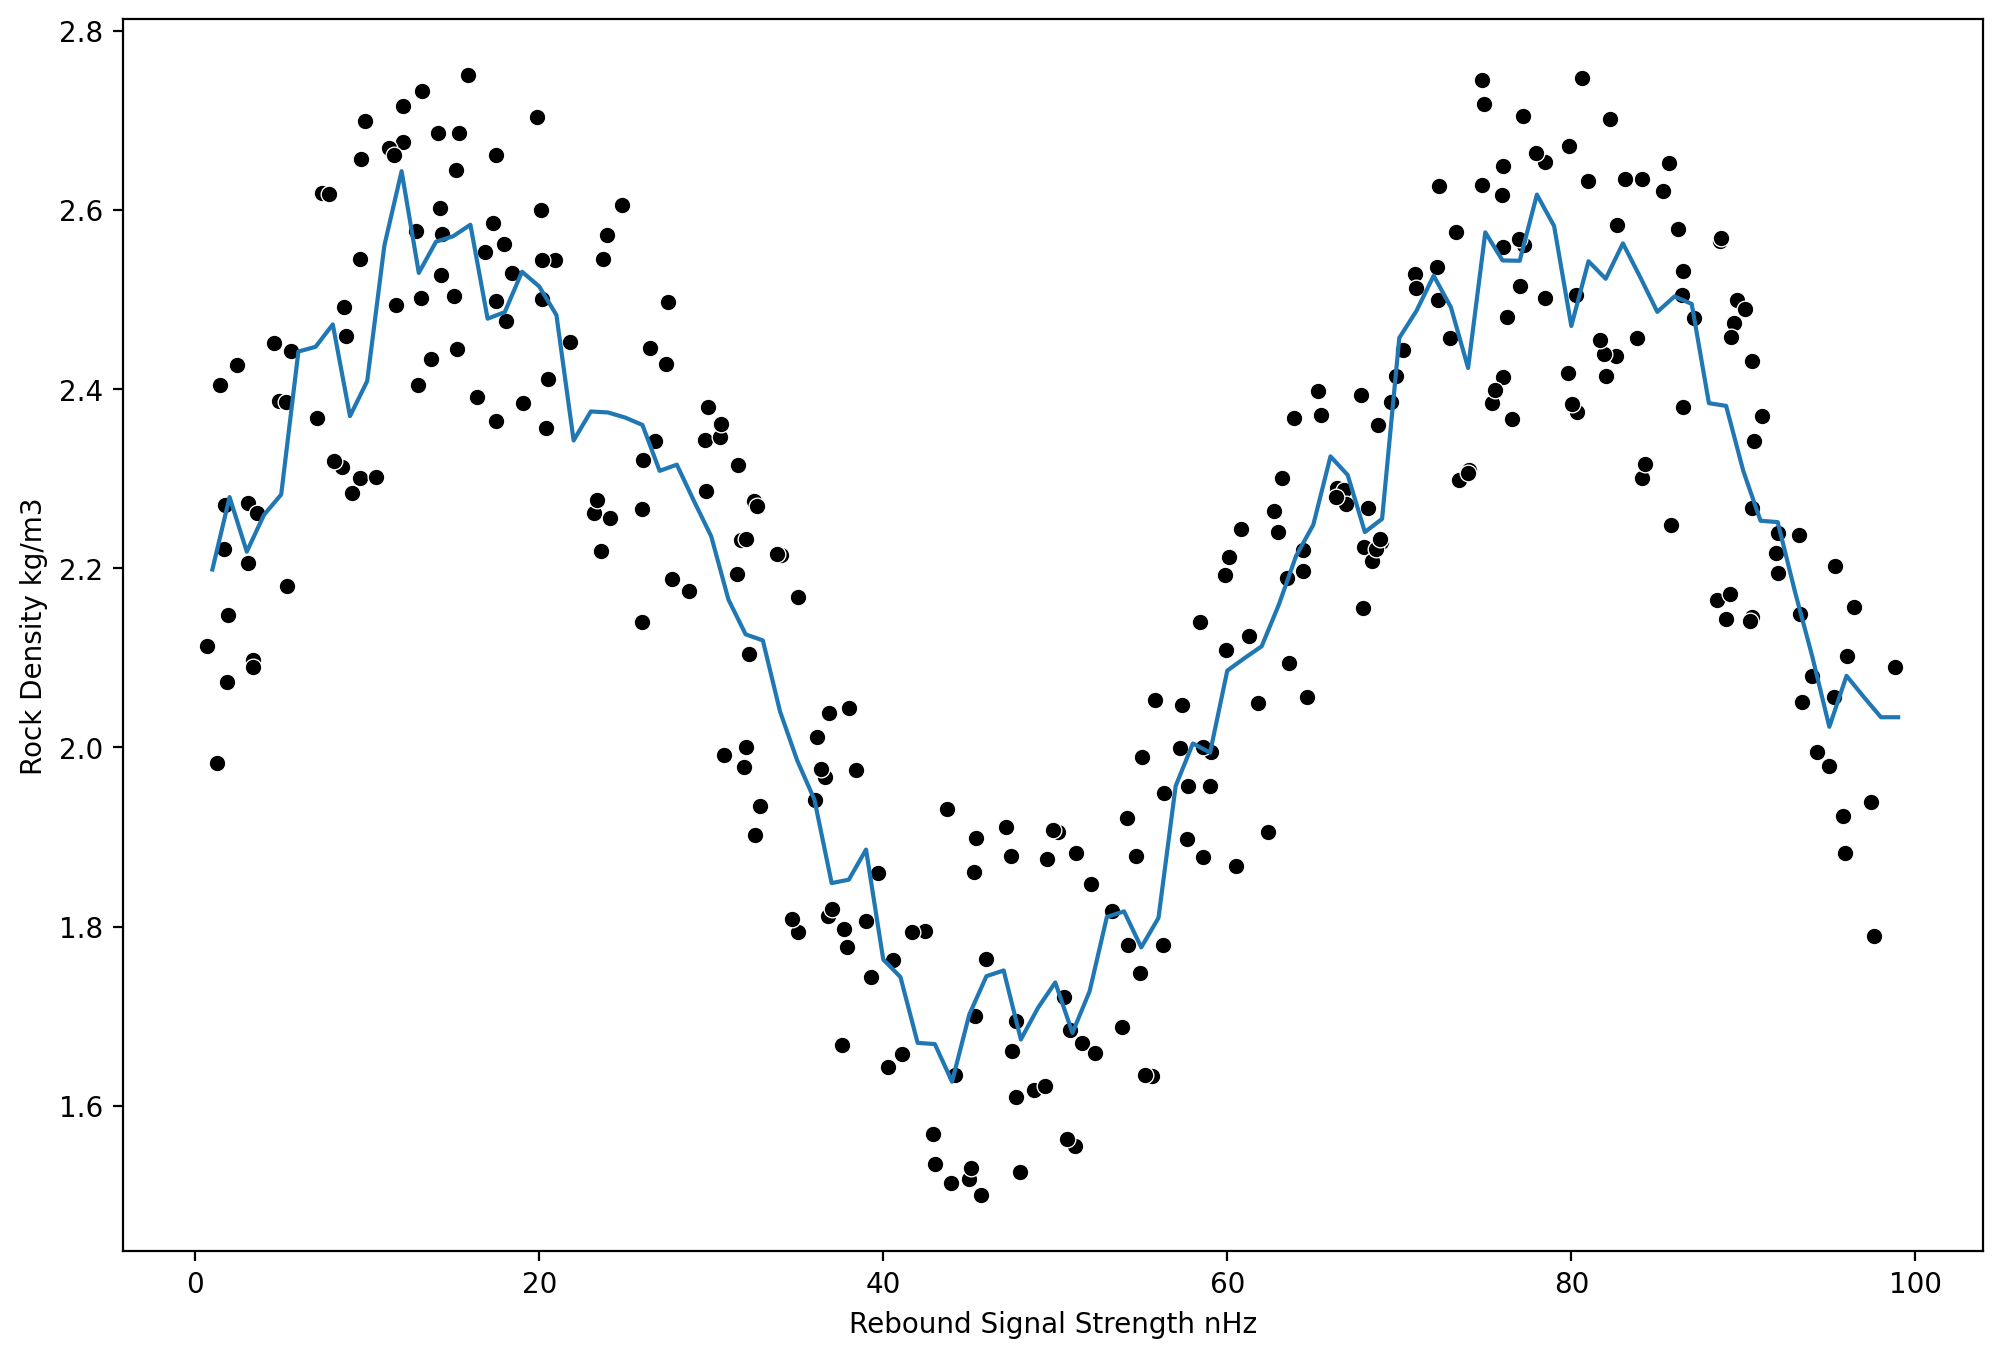

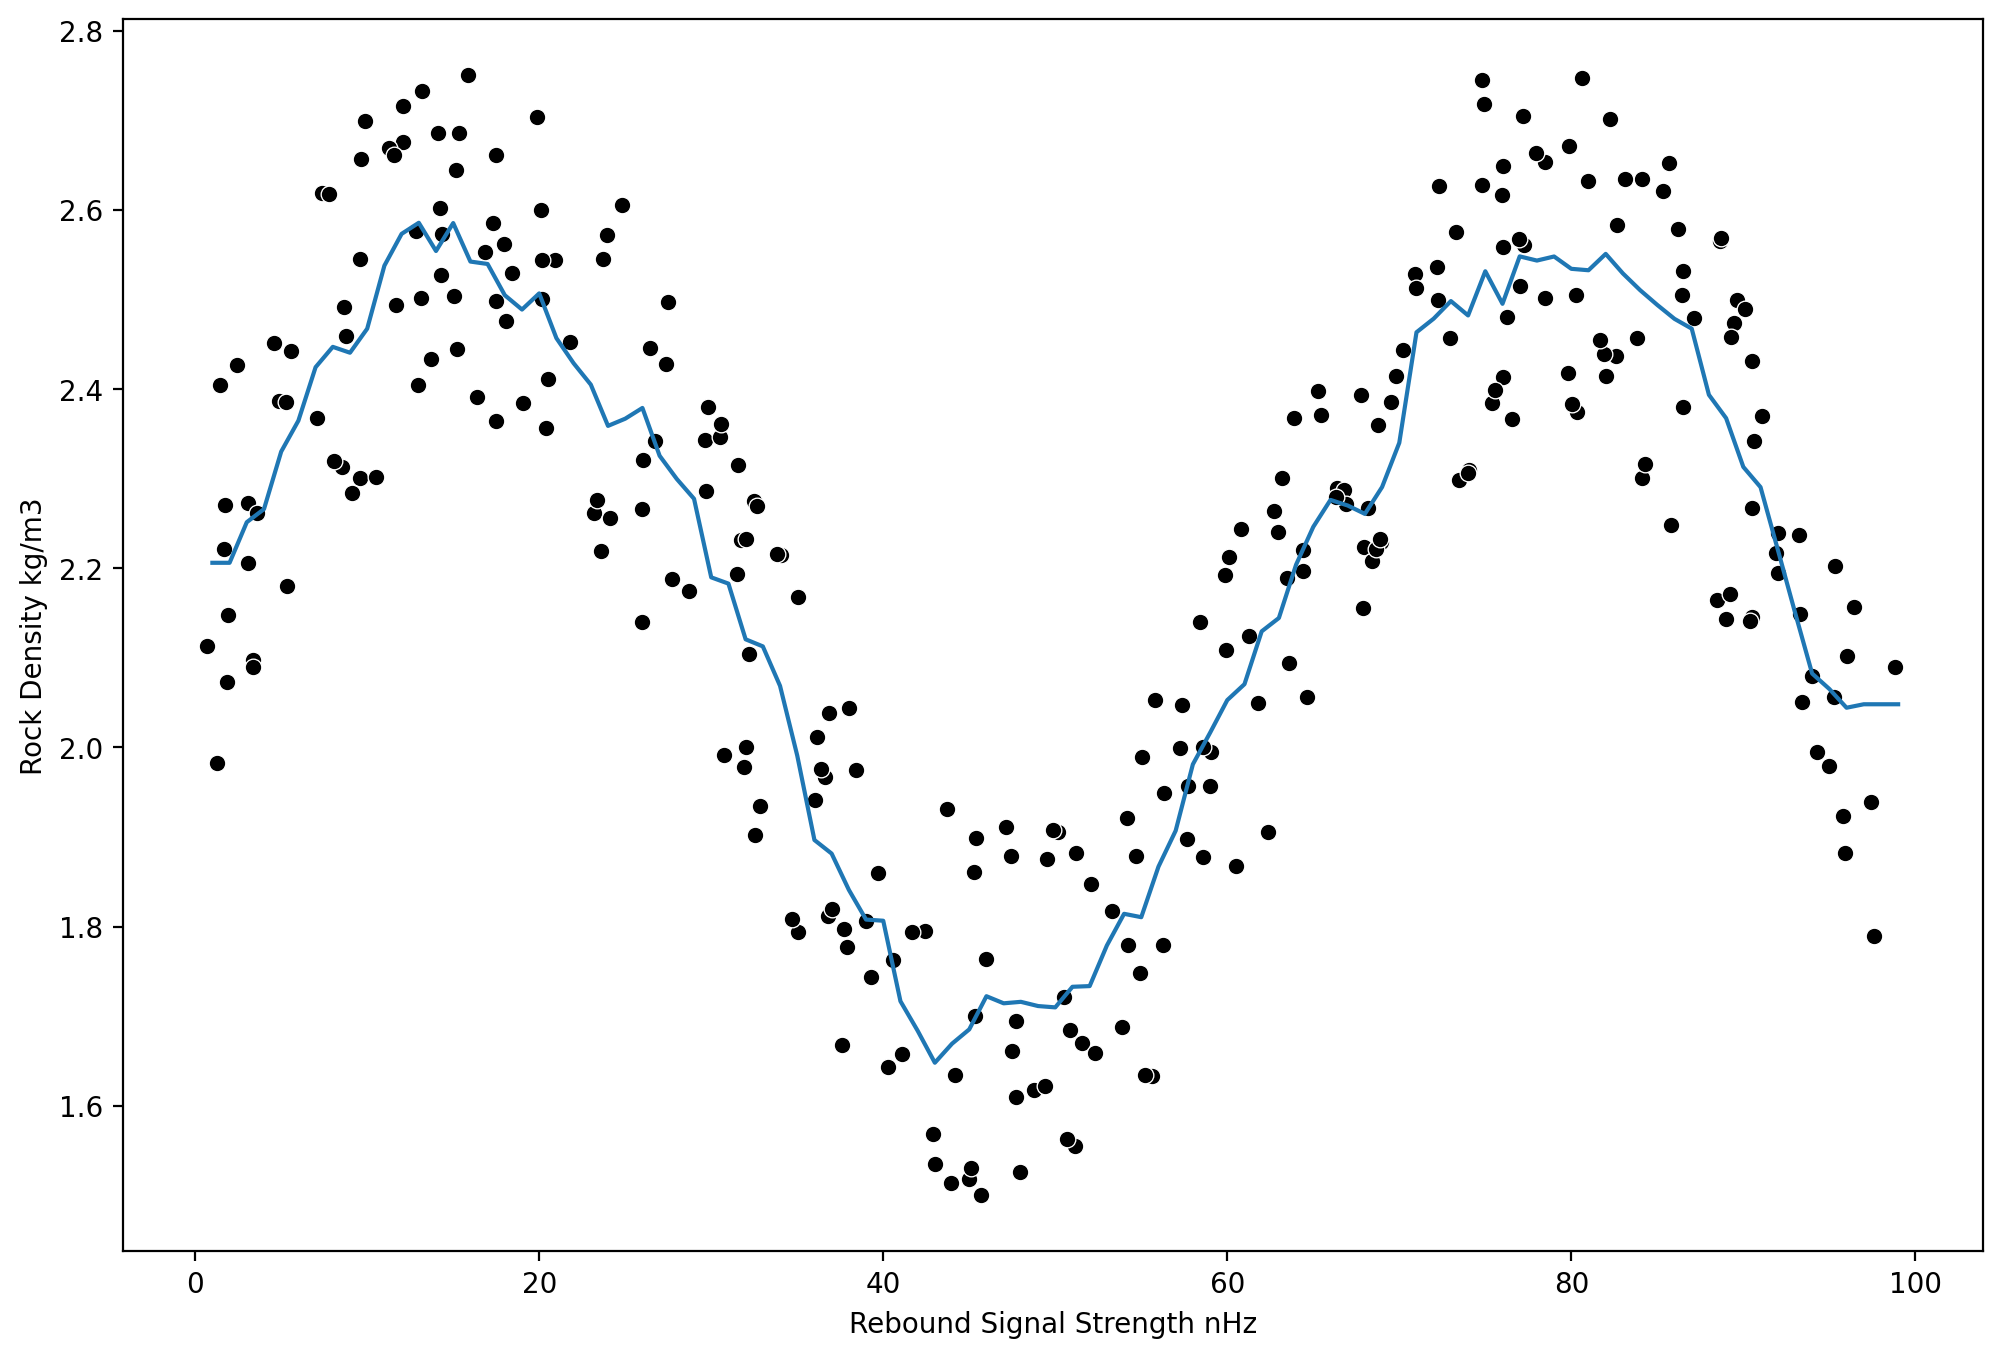

In [55]:
k_values = [1,5,10]

for n in k_values:
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)

MAE: 0.11877297474442378
RMSE: 0.1523487028635337


D:\Downloads\Python\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
D:\Downloads\Python\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


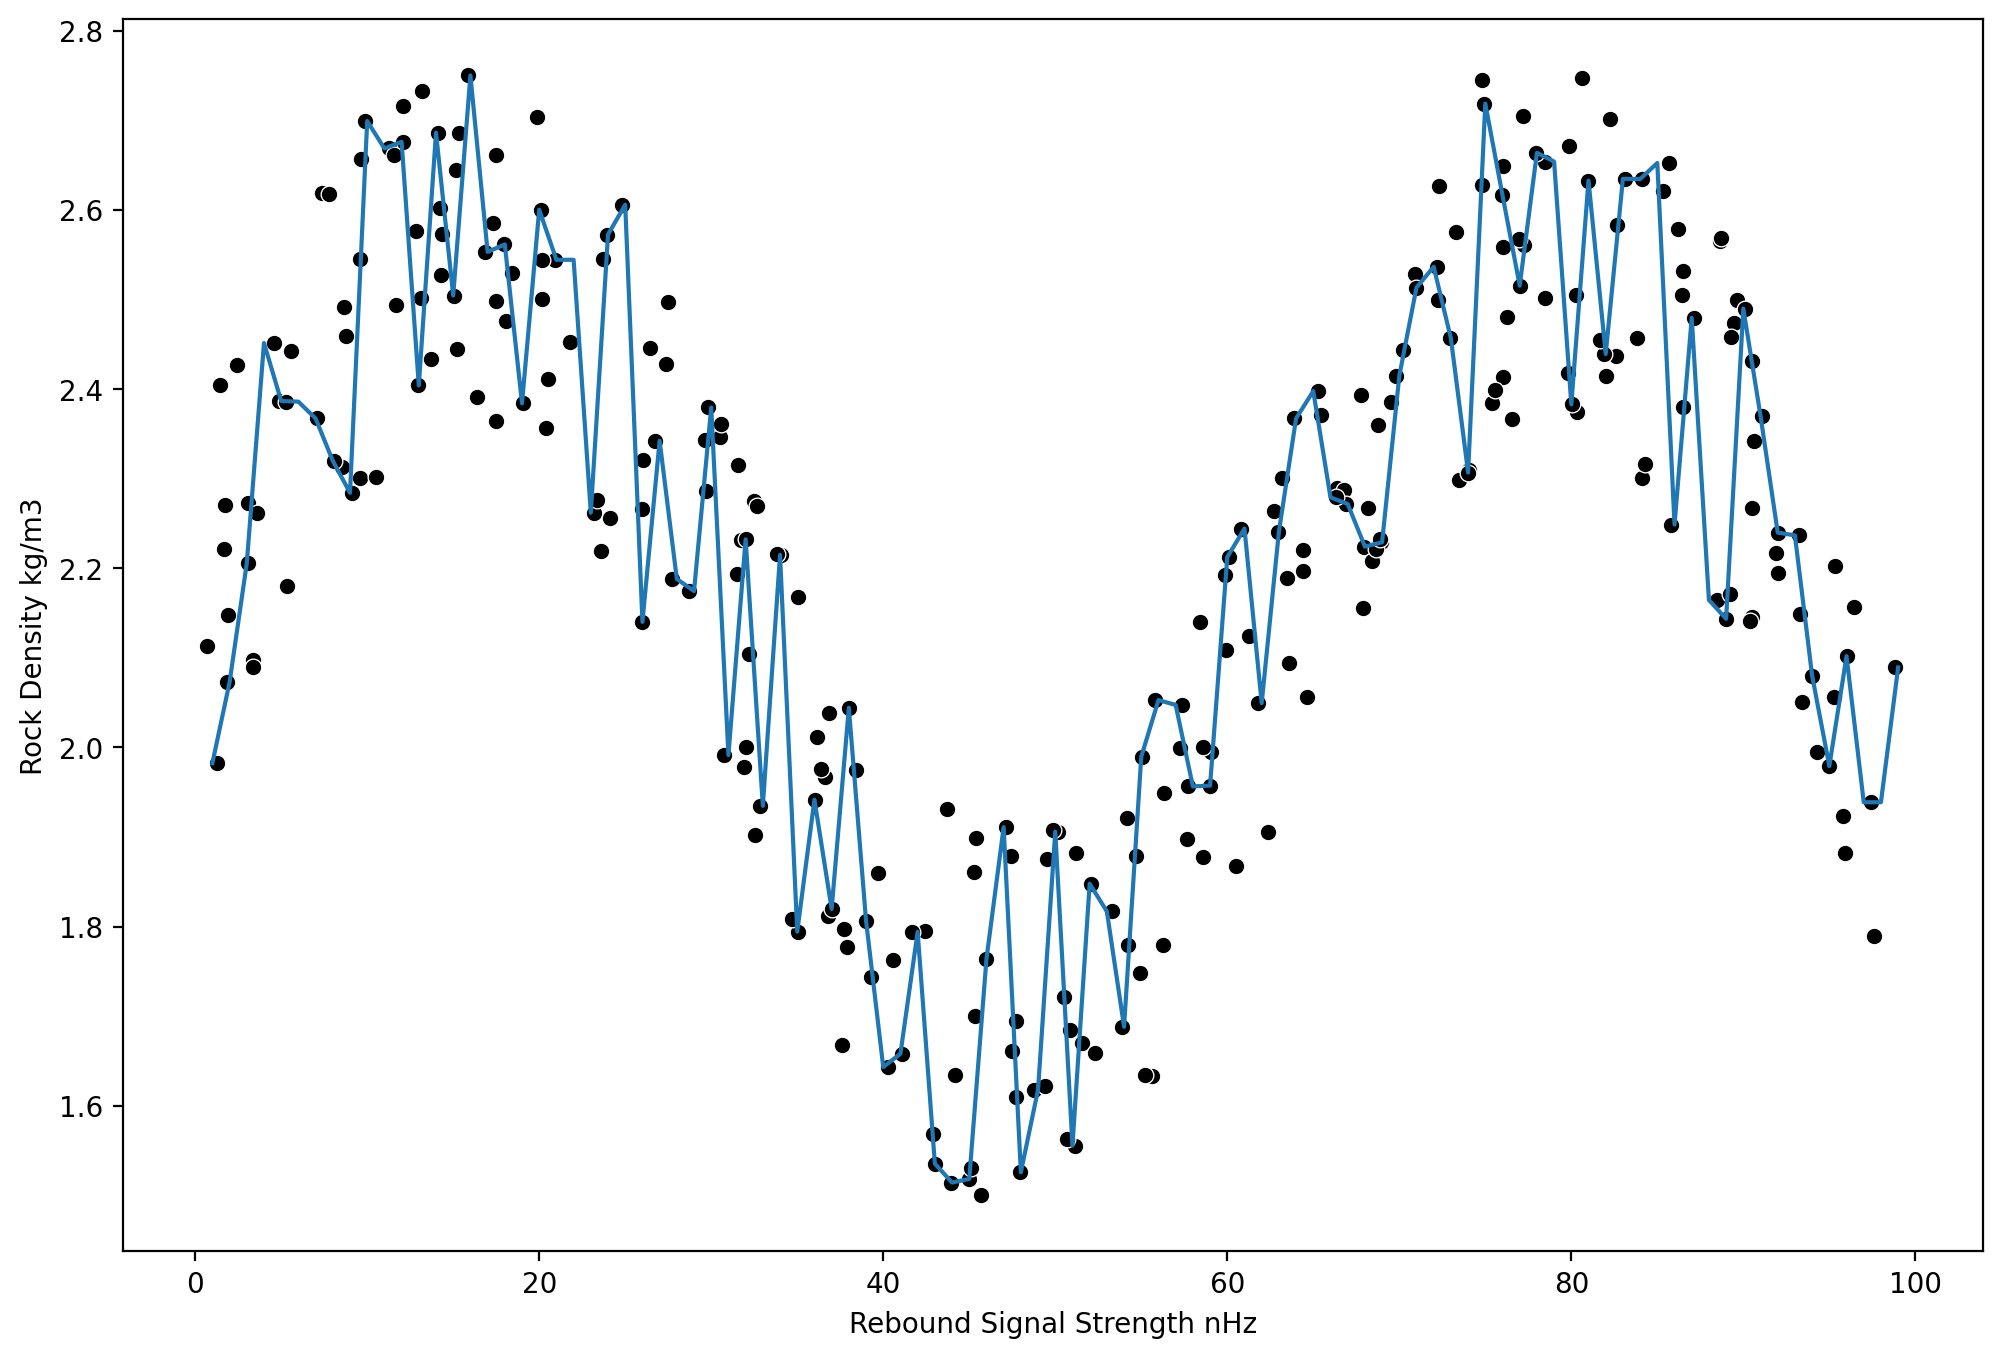

In [57]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
run_model(model, X_train,y_train,X_test,y_test)

MAE: 0.12017510123813938
RMSE: 0.13498358709618385


D:\Downloads\Python\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
D:\Downloads\Python\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


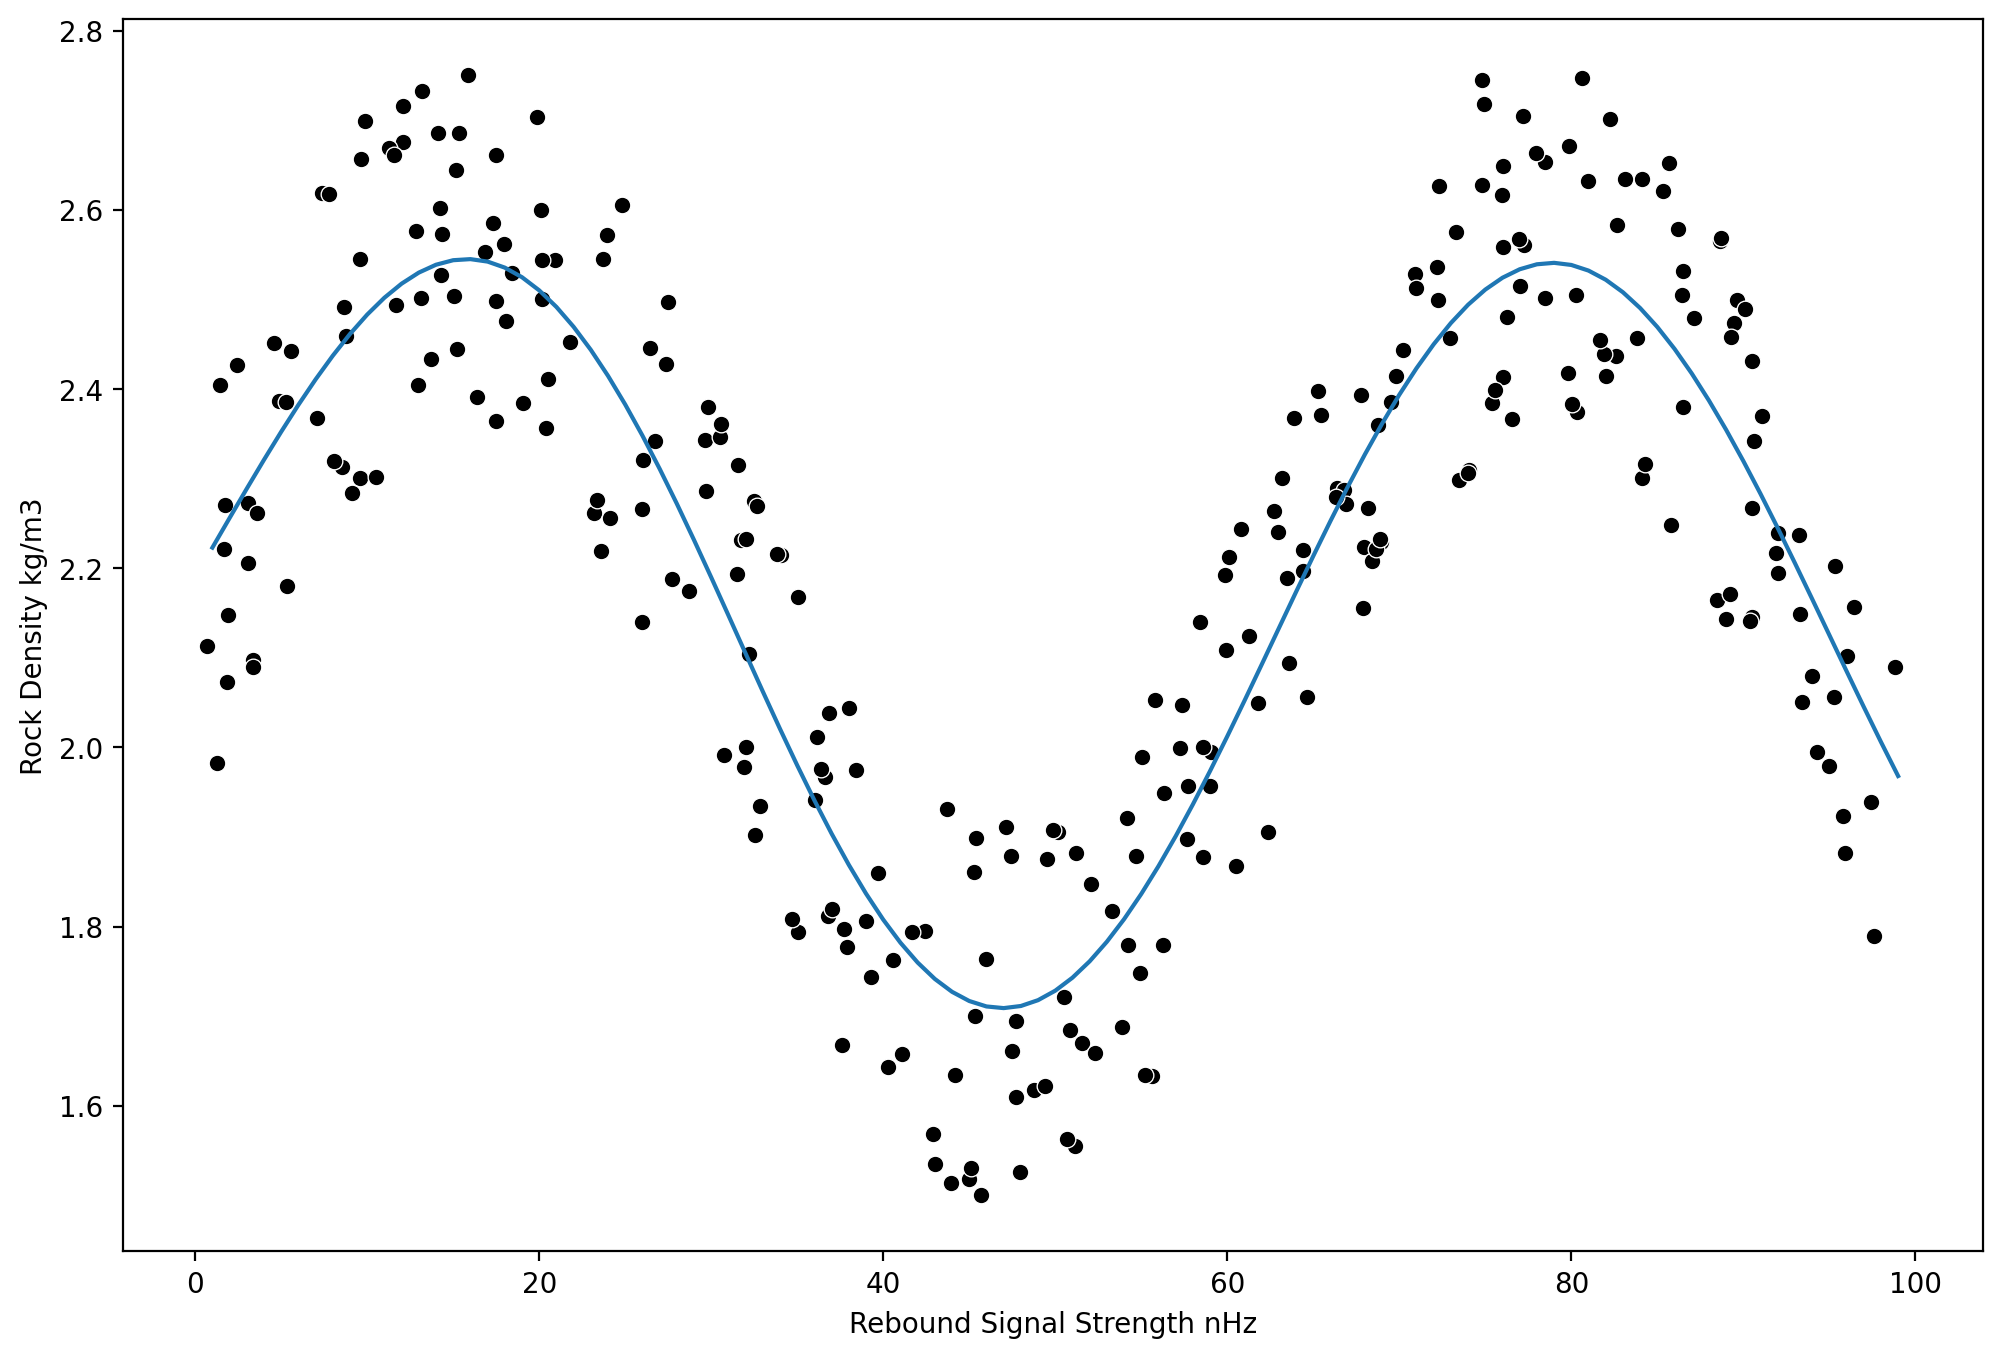

In [62]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
model = SVR()
params = {"C": [0.01,0.1,1,5,10,100,1000],
         "gamma": ["auto", "scale"]}
grid = GridSearchCV(SVR,params)
run_model(model, X_train,y_train,X_test,y_test)


In [63]:
from sklearn.ensemble import RandomForestRegressor

MAE: 0.11709137334929912
RMSE: 0.14511895336634528


D:\Downloads\Python\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Downloads\Python\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


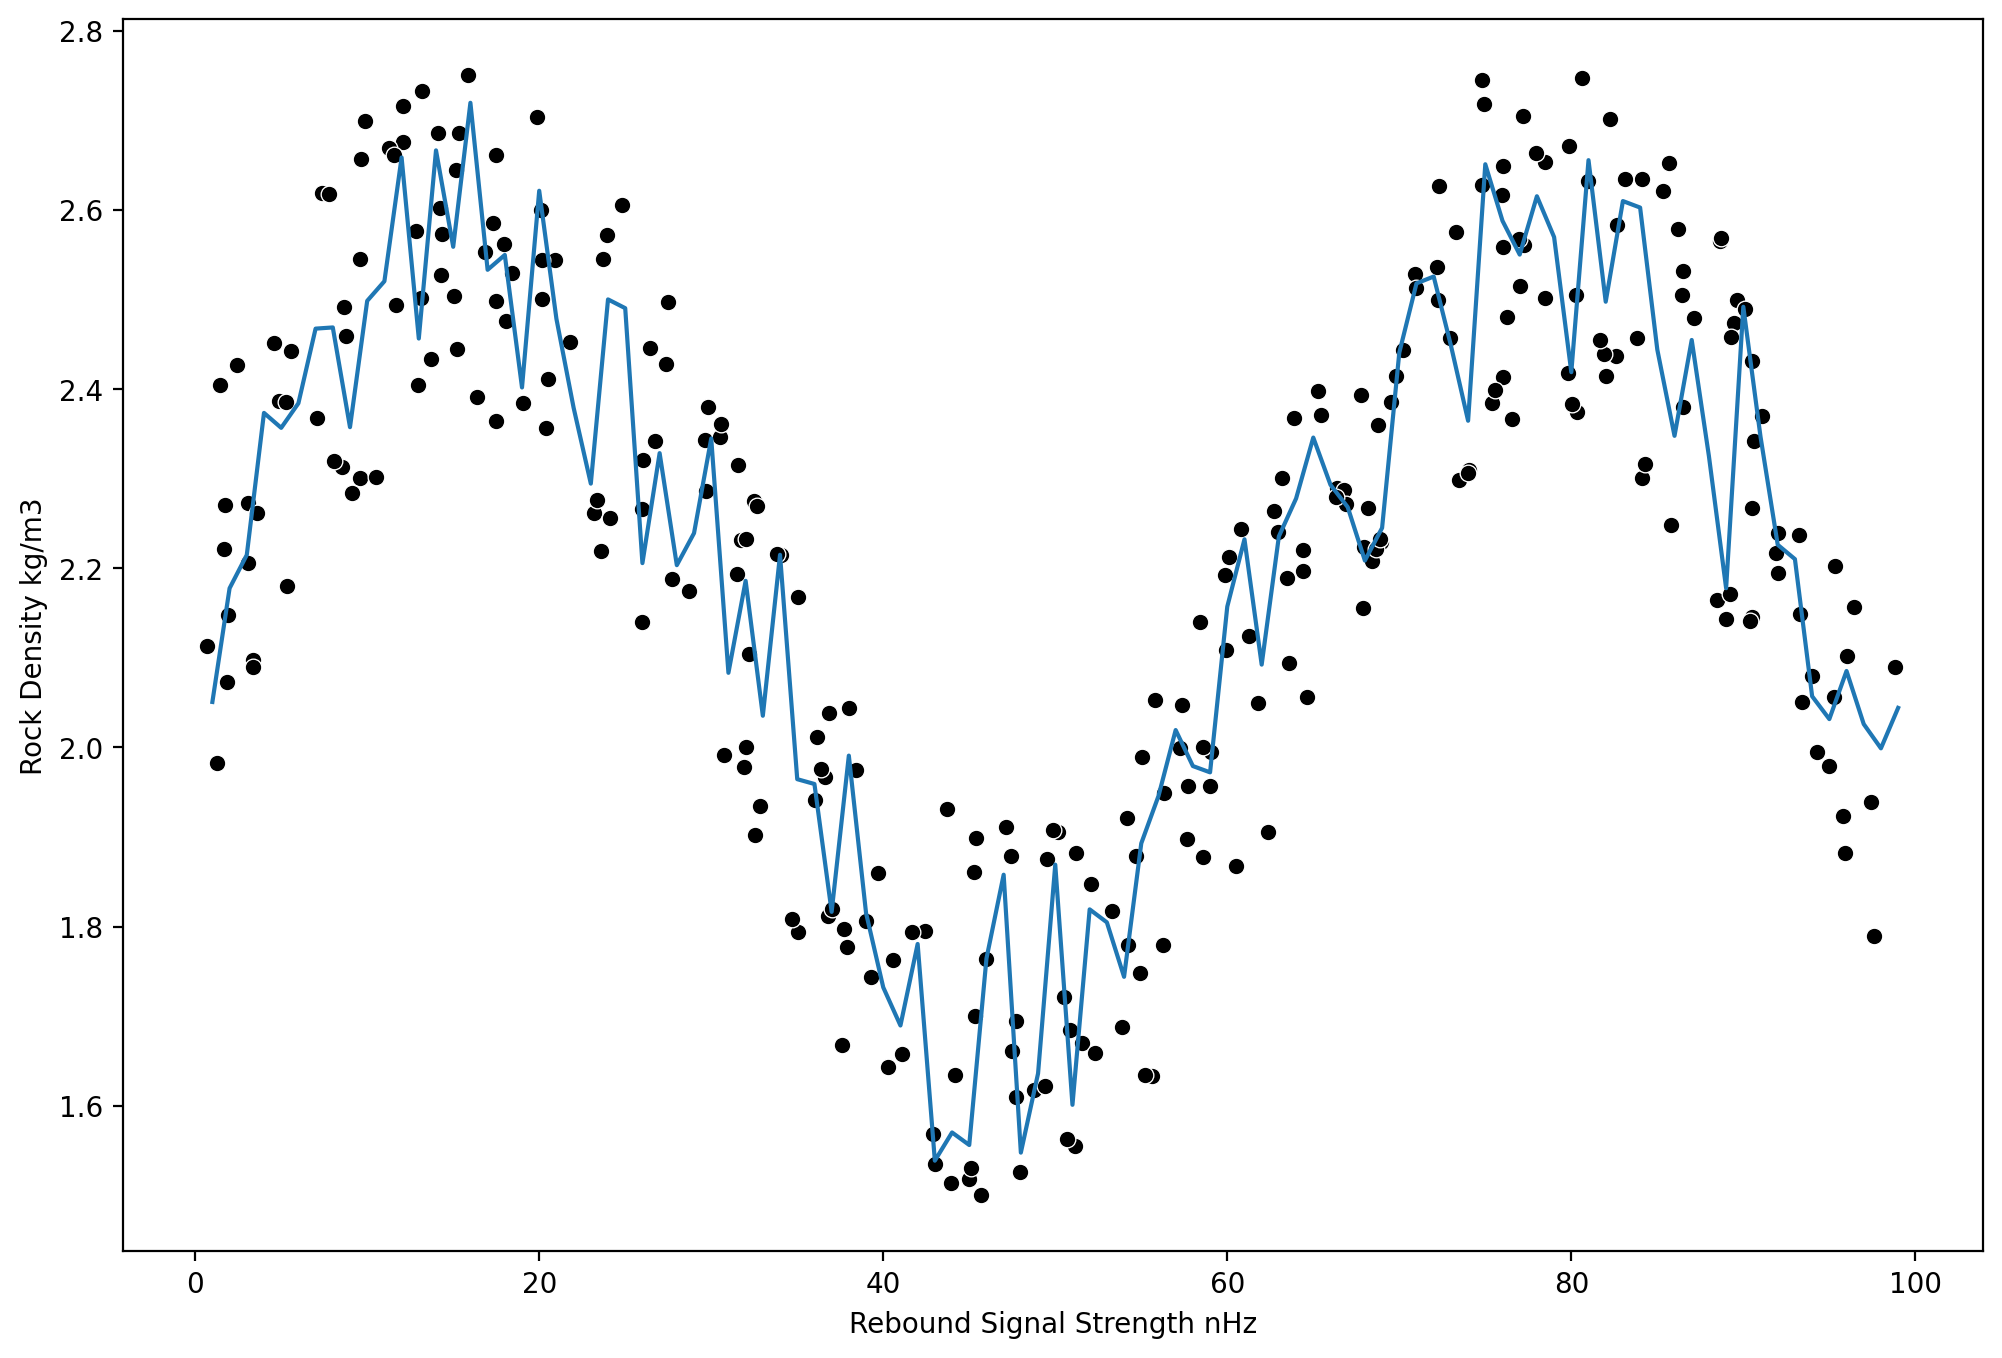

In [64]:
rfr = RandomForestRegressor(n_estimators=10)
run_model(rfr, X_train,y_train,X_test,y_test)

In [65]:
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor

MAE: 0.11318284854800689
RMSE: 0.13294148649584667


D:\Downloads\Python\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
D:\Downloads\Python\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


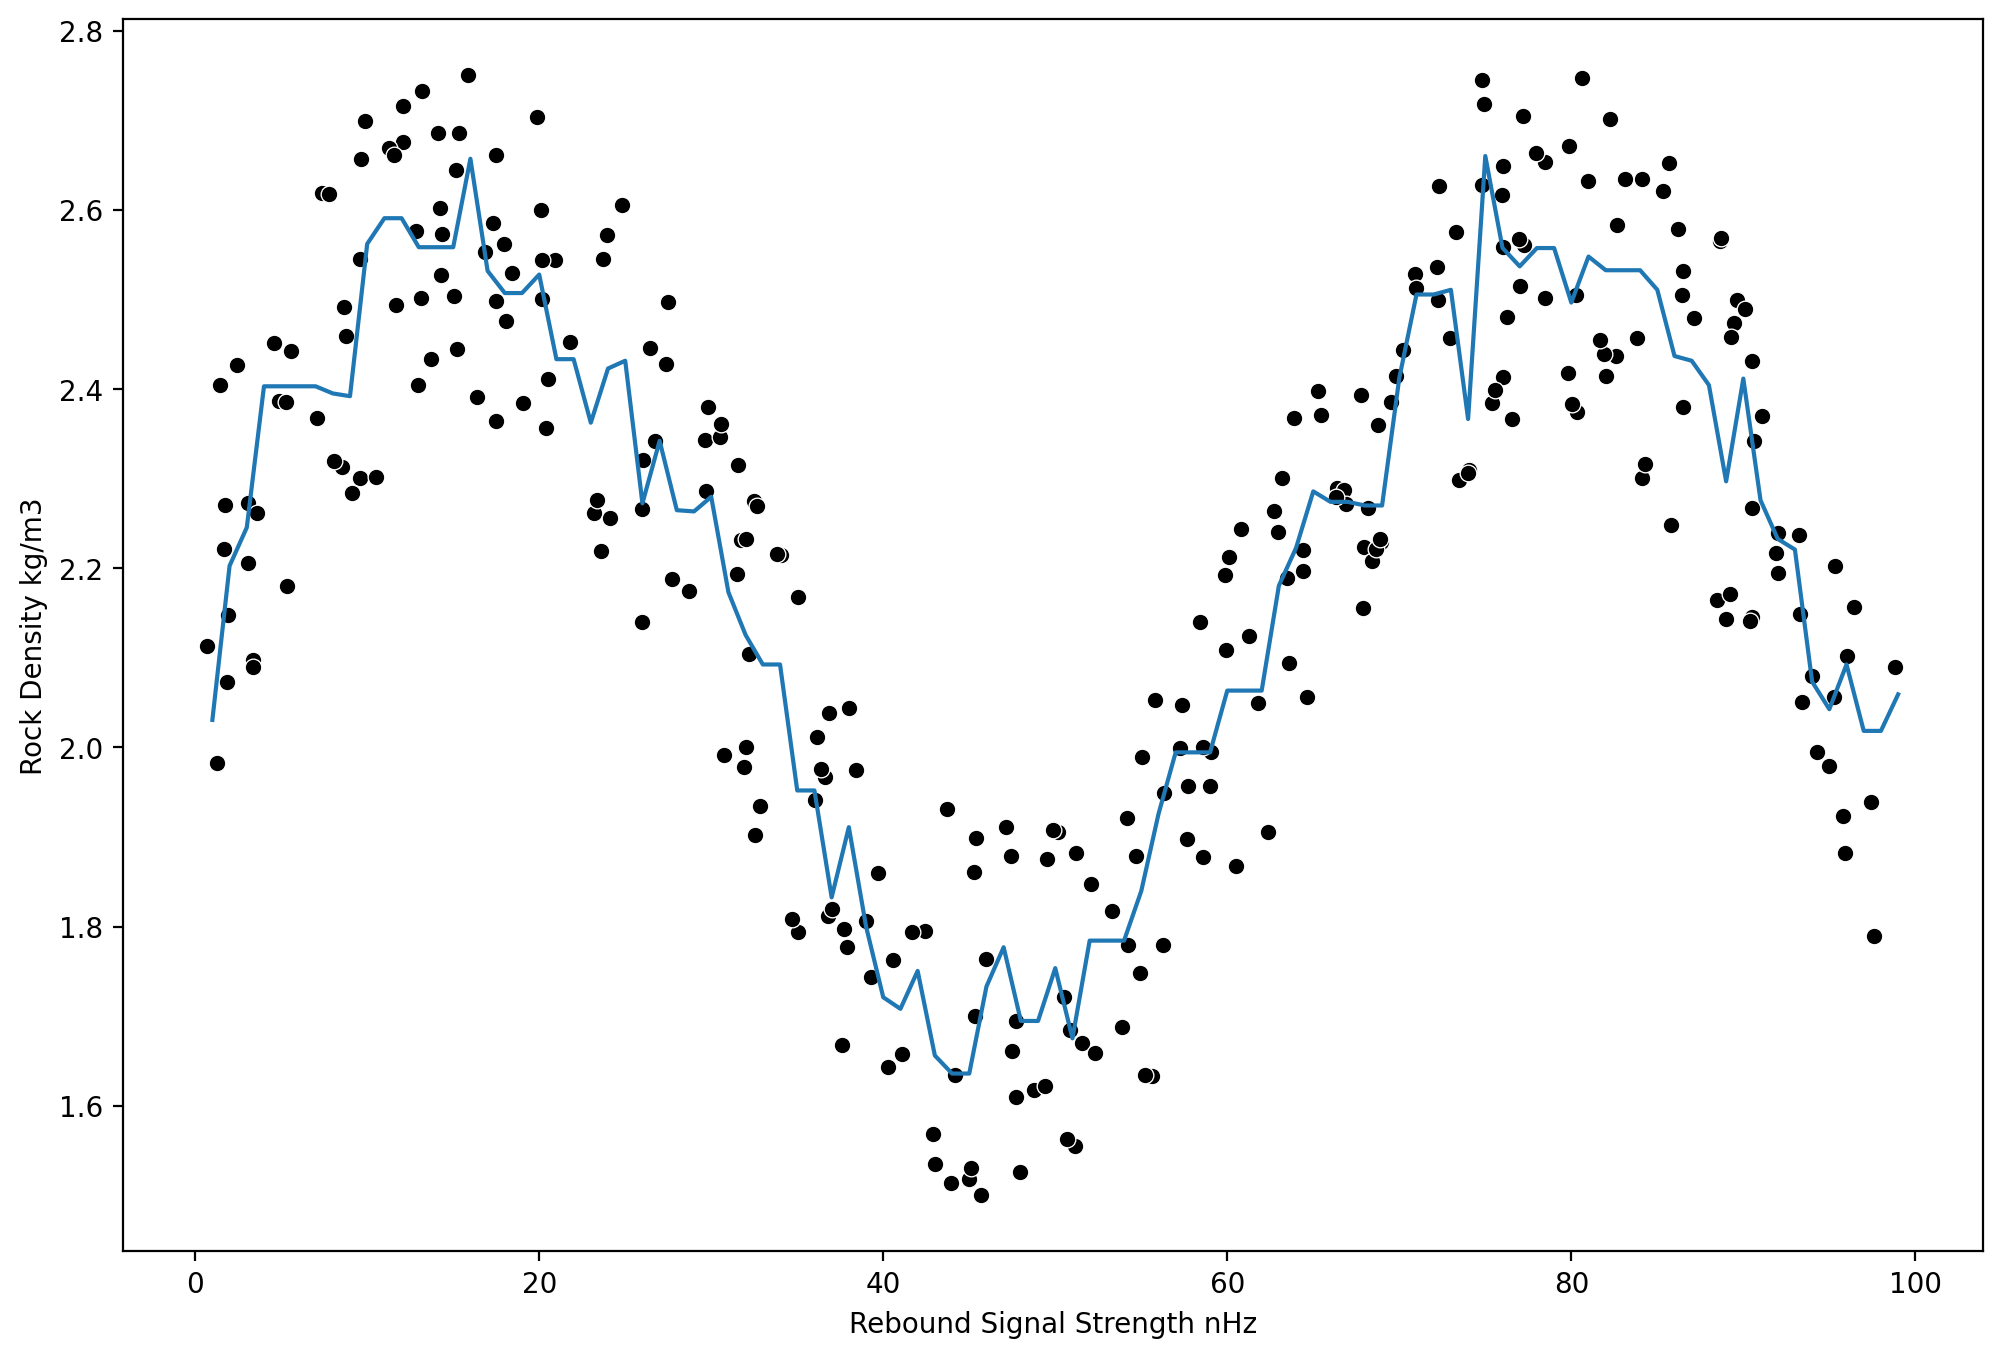

In [66]:
model = GradientBoostingRegressor()
run_model(model, X_train,y_train,X_test,y_test)